In [1]:
import numpy as np
#Policy gradient

def get_obsx(obs):
    obx = np.array(obs)
    obx = obx/np.sum(obx*obx)
    return obs

def value(params, obs):
    W = params['W']
    obsx = get_obsx(obs)
    score = np.sum(W*np.array(obsx))
    return score

def probability(params, action, obs):
    score = value(params, obs)
    a = -(action-0.5)*2
    return 1/(1 + np.exp(a*score))

def policy(params, obs):
    p = probability(params, 0, obs)
    s = np.random.rand()
    if s > p:
        return 1
    else:
        return 0

def gradient(params, action, obs):
    gradients = {}
    a = -(action-0.5)*2
    score = value(params, obs)
    obsx = get_obsx(obs)
    gradients['W'] = -np.exp(a*score)*a*np.array(obsx)/(1+np.exp(a*score))
    
    return gradients
    
def num_gradient(params, action, obs):
    h = 1e-5
    W = params['W']
    gradients = {}
    gradients['W'] = np.zeros(len(W))

    for i in range(len(W)):
        W[i] += h
        p1 = probability(params, action, obs)
        W[i] -= 2*h
        p2 = probability(params, action, obs)
        W[i] += h
        gradients['W'][i] = (np.log(p1)-np.log(p2))/(2*h)
        
    return gradients
    
def update_gradients(params, actions, states, rewards):
    n = len(actions)
    if n == 0:
        return
    
    learning_rate = params['learning_rate']
    discount = params['discount']
    b = params['b']
    acc_rew = []
    acc_rew.append(rewards[-1])
    for i in range(n-1):
        acc_rew = [discount*acc_rew[0] + rewards[n-i-1]] + acc_rew
    
    g0 = np.zeros(len(params['W']))
    for i in range(n):
        g = gradient(params, actions[i], states[i])
        g0 += (acc_rew[i]-b*acc_rew[i]/(n-i))*g['W']
    
    params['W'] += learning_rate*g0
    
params = {'W':np.random.randn(4)}
obs = [0.1, 0.2, 3, -0.1]
action = policy(params, obs)
print(params)
print(value(params, obs))
print(policy(params, obs))
print(gradient(params, action, obs),'\n',num_gradient(params, action, obs))

{'W': array([ 0.18526001, -1.95088233, -2.61575886,  0.75538765])}
-8.29446580147
0
{'W': array([ -2.49833549e-05,  -4.99667098e-05,  -7.49500647e-04,
         2.49833549e-05])} 
 {'W': array([ -2.49833565e-05,  -4.99667075e-05,  -7.49500645e-04,
         2.49833565e-05])}


In [2]:
#Sarsa Policy
def policy_sarsa(params, obs):
    W1, W2 = params['W1'], params['W2']
    eps = params['eps']
    q1 = np.sum(W1*obs)
    q2 = np.sum(W2*obs)
    
    r = np.random.rand()
    best = 0
    if q2 > q1:
        best = 1
        
    if r < 1-eps+eps/2:
        return best
    else:
        return 1-best
    
def update_sarsa(params, actions, states, rewards):
    n = len(actions)
    if n == 0:
        return
    
    learning_rate = params['learning_rate']
    discount = params['discount']
    
    acc_rew = []
    acc_rew.append(rewards[-1])
    for i in range(n-1):
        acc_rew = [discount*acc_rew[0] + rewards[n-i-1]] + acc_rew
    
    g1 = np.zeros(4)
    g2 = np.zeros(4)
    W1 = params['W1']
    W2 = params['W2']
    
    for i in range(n):
        if actions[i] == 0:
            W = params['W1']
            g = g1
        else:
            W = params['W2']
            g = g2
            
        q = np.sum(states[i]*W)
        g += learning_rate*(q-acc_rew[i])*states[i]
    
    W1 -= g1
    W2 -= g2
    params['eps'] *= 0.999
    params['learning_rate'] = 1/params['time_step']

[2017-05-02 16:02:12,360] Making new env: CartPole-v1
[2017-05-02 16:02:12,377] DEPRECATION WARNING: env.spec.timestep_limit has been deprecated. Replace your call to `env.spec.timestep_limit` with `env.spec.tags.get('wrapper_config.TimeLimit.max_episode_steps')`. This change was made 12/28/2016 and is included in version 0.7.0
[2017-05-02 16:02:12,379] Clearing 68 monitor files from previous run (because force=True was provided)
[2017-05-02 16:02:12,387] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video000000.mp4


5


[2017-05-02 16:02:13,188] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video000001.mp4
[2017-05-02 16:02:13,438] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video000008.mp4
[2017-05-02 16:02:14,137] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video000027.mp4
[2017-05-02 16:02:14,339] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video000064.mp4
[2017-05-02 16:02:14,580] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video000125.mp4


16.56


[2017-05-02 16:02:17,056] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video000216.mp4


54.02
171.79


[2017-05-02 16:02:19,027] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video000343.mp4


355.21


[2017-05-02 16:02:28,109] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video000512.mp4


415.95
439.3
421.35


[2017-05-02 16:02:38,090] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video000729.mp4


478.04
493.51


[2017-05-02 16:02:51,271] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video001000.mp4


496.89
496.91
490.46
491.46
499.22
491.06
495.39
498.6
498.61
495.91


[2017-05-02 16:03:17,555] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video002000.mp4


497.84
490.96
498.4
493.51
500.0
500.0
497.94
497.81
498.01
499.28


[2017-05-02 16:03:41,225] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video003000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:04:01,538] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video004000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:04:22,012] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video005000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:04:42,264] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video006000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:05:02,564] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video007000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:05:23,309] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video008000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:05:45,447] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video009000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:06:05,975] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video010000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:06:24,327] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video011000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:06:43,898] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video012000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:07:01,928] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video013000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:07:17,504] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video014000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:07:33,043] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video015000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:07:48,457] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video016000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:08:04,079] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video017000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:08:19,667] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video018000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:08:35,272] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video019000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:08:50,862] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video020000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:09:06,351] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video021000.mp4


500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:09:22,000] Starting new video recorder writing to /tmp/cartpole-experiment-7/openaigym.video.0.21662.video022000.mp4


500.0
500.0
500.0
500.0
500.0
500.0


[2017-05-02 16:09:33,031] Finished writing results. You can upload them to the scoreboard via gym.upload('/tmp/cartpole-experiment-7')


500.0


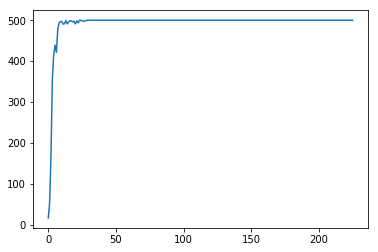

In [4]:
import operator
import matplotlib.pyplot as plt
from gym import wrappers

#Cross-Entropy
np.random.seed(0)

ds = [4, 1]
dim = 0
for i in range(len(ds)-1):
    dim += (ds[i]+1)*(ds[i+1])

print(dim)

curr_mean = 0
curr_std = np.ones(dim)
it = 0
        
def policy_cem(obs):
    out = obs.reshape(1, 4)
    W = Ws[it]
    
    ind = 0
    for i in range(len(ds)-1):
        out = out.reshape(1, -1)
        
        d1 = ds[i]
        d2 = ds[i+1]
        w = W[ind:ind+d1*d2].reshape(d1, d2)
        ind = ind+d1*d2
        b = W[ind:ind+d2]
        ind = ind + d2
        out = out.dot(w) + b
        if ind != len(W):
            out = np.tanh(out)
    
    p = out[0]
    if p >= 0:
        return 1
    else:
        return 0
    
env = gym.make('CartPole-v1')
env = wrappers.Monitor(env, '/tmp/cartpole-experiment-7',force=True)

scores = []
std = []
mean = []
alpha = 1

for i in range(1000):
    
    Ws = (np.random.randn(100, dim))*curr_std + curr_mean
    b = {}
    for j in range(100):
        
        it = j
        sc, r = play({}, 1, 500)
        b[j] = -r
    
    scores.append(np.mean([-v for i, v in b.items()]))
    print(scores[-1])
    sorted_b = sorted(b.items(), key=operator.itemgetter(1))
    idx = [k for k, v in sorted_b[:20]]
    v = np.array([v for k, v in sorted_b[:20]]).reshape(-1, 1)
    
    curr_mean = curr_mean*(1-alpha) + alpha*np.sum(Ws[idx]*v, axis=0)/np.sum(v)
    curr_std = curr_std*(1-alpha) + alpha*np.sqrt(np.sum(v*(Ws[idx]-curr_mean)**2, axis=0)/np.sum(v)) #+ np.max(10-i/100, 0)
    
    if np.sqrt(np.sum(curr_std**2)) < 1e-3:
        break
        
    std.append(curr_std[0])
    mean.append(curr_mean[0])

env.close()

#plt.plot(std)
#plt.plot(mean)
plt.plot(scores)
plt.show()


In [3]:
plt.plot(std)
#plt.plot(mean)
plt.plot(np.array(scores)/100)
plt.show()


NameError: name 'std' is not defined

In [2]:
import gym
from gym import wrappers
import matplotlib.pyplot as plt

def play(params, num_episodes, num_steps):
    #env = gym.make('CartPole-v1')
    time_steps = []
    #env = wrappers.Monitor(env, '/tmp/cartpole-experiment-1')
    params['time_step'] = 1
    for i_episode in range(num_episodes):
        observation = env.reset()
        states, actions, rewards = [], [], []
        r = 0
        states.append(observation)
        for t in range(num_steps):
            #env.render()
            #rewards.append(0)
            
            #action = policy(params, observation)
            #action = policy_sarsa(params, observation)
            action = policy_cem(observation)
            
            observation, reward, done, info = env.step(action)
            r += reward
            
            states.append(observation)
            actions.append(action)
            rewards.append(reward)

            #update_sarsa(params, actions, states, rewards)
                
            if done:
                break
        
        #rewards[-1] = -1
        
        #update_sarsa(params, actions, states, rewards)
        params['time_step'] += 1
        
        #update_gradients(params, actions, states, rewards)
        states.append(observation)
        #print("Episode ", i_episode, " finished in ", t, " steps, reward ", r)
        
        time_steps.append(t)

    #env.close()
    #w, b = best_params
    return time_steps, r

learning_rates = [1e-2, 1e-1, 1, 10, 100]
handles = []
discounts = [0.1, 0.5, 0.8, 0.9, 0.95]

lr = 1
d = 0.9
b = 0

#params = {'W':np.zeros(4), 'eps':0.1, 'learning_rate':lr, 'discount':d, 'b': b}

params = {'W1':np.ones(4), 'W2':np.ones(4), 'eps':0.1, 'learning_rate':lr, 'discount':d, 'b': b}
n = 10000
t = 10000
#tx = play(params, n, t)
#print(lr, b, np.mean(tx), np.var(tx), np.max(tx))
#l, = plt.plot(tx, label=('lr = %f, b = %d, d = %f'%(lr, b, d)))
#handles.append(l)

#plt.legend(handles=handles)
#plt.show()

In [4]:
import gym
env = gym.make('Humanoid-v1')
o = env.reset()
print(o)
env.render()

[2017-05-17 14:20:40,252] Making new env: Humanoid-v1


[  1.39043957e+00   9.99959229e-01  -3.95274909e-03  -4.33445014e-03
  -6.86498760e-03  -3.54313860e-03  -9.91561816e-03  -2.95241860e-03
   6.51695687e-03  -4.03616822e-03   5.12585846e-03   1.96430974e-04
   2.89952291e-03  -9.52448181e-03   2.52792220e-03  -4.06812492e-04
   9.18930051e-03   6.53860604e-03  -7.85570085e-03  -5.60707693e-03
  -4.41642854e-03   4.88313147e-03   3.86982292e-04   5.00601601e-03
  -4.14957584e-03  -9.42049287e-03   7.77597109e-03  -8.97609188e-03
  -2.44817499e-03   6.99319700e-03  -4.00300638e-03   3.20959926e-03
  -2.91973586e-03  -9.00002535e-03   4.00870781e-03   7.42317732e-03
  -5.92563255e-03  -3.07320727e-03  -6.46894136e-03   9.10377224e-04
   9.80271114e-03   9.12820734e-03   9.33516834e-03  -2.06256528e-03
  -9.80074075e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   2.22946343e+00
   2.22321380e+00   3.87708621e-02

In [ ]:
import matplotlib.pyplot as plt

num_episodes = 500
num_steps = 500
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1, 1]
handles = []
for lr in learning_rates:
    params = {'W':np.random.rand(4)*2-1, 'learning_rate':lr, 'discount':0.99}
    params['learning_rate'] = lr
    t = play(params, num_episodes, num_steps)
    score = np.mean(np.array(t))
    l, = plt.plot(t, label=('lr = %f'%lr))
    handles.append(l)

plt.legend(handles=handles)
plt.show()
print (score, params)

In [9]:
import gym
from gym import wrappers

params = {'W':np.zeros(4), 'learning_rate':1, 'discount':0.5, 'b':0}

env = gym.make('CartPole-v1')
env = wrappers.Monitor(env, '/tmp/cartpole-experiment-6',force=True)
for k in range(500):
    observation = env.reset()
    states, actions, rewards = [], [], []
    states.append(observation)
    for t in range(500):
        env.render()

        action = policy(params, observation)

        new_observation, reward, done, info = env.step(action)

        observation = new_observation

        states.append(observation)
        actions.append(action)
        rewards.append(0)

        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
    
    rewards[-1] = -1
    update_gradients(params, actions, states, rewards)
    states.append(observation)
            
env.close()


[2017-04-17 20:32:03,722] Making new env: CartPole-v1
[2017-04-17 20:32:03,729] DEPRECATION WARNING: env.spec.timestep_limit has been deprecated. Replace your call to `env.spec.timestep_limit` with `env.spec.tags.get('wrapper_config.TimeLimit.max_episode_steps')`. This change was made 12/28/2016 and is included in version 0.7.0
[2017-04-17 20:32:03,730] Clearing 18 monitor files from previous run (because force=True was provided)
[2017-04-17 20:32:03,734] Starting new video recorder writing to /tmp/cartpole-experiment-6/openaigym.video.1.44148.video000000.mp4
[2017-04-17 20:32:04,406] Starting new video recorder writing to /tmp/cartpole-experiment-6/openaigym.video.1.44148.video000001.mp4


Episode finished after 27 timesteps
Episode finished after 89 timesteps
Episode finished after 115 timesteps
Episode finished after 77 timesteps
Episode finished after 54 timesteps


[2017-04-17 20:32:05,982] Starting new video recorder writing to /tmp/cartpole-experiment-6/openaigym.video.1.44148.video000008.mp4


Episode finished after 214 timesteps
Episode finished after 71 timesteps
Episode finished after 119 timesteps
Episode finished after 144 timesteps
Episode finished after 54 timesteps
Episode finished after 129 timesteps
Episode finished after 127 timesteps
Episode finished after 94 timesteps
Episode finished after 58 timesteps
Episode finished after 156 timesteps
Episode finished after 58 timesteps
Episode finished after 107 timesteps
Episode finished after 105 timesteps
Episode finished after 114 timesteps
Episode finished after 139 timesteps
Episode finished after 293 timesteps
Episode finished after 477 timesteps
Episode finished after 314 timesteps
Episode finished after 305 timesteps
Episode finished after 247 timesteps
Episode finished after 75 timesteps


[2017-04-17 20:32:09,679] Starting new video recorder writing to /tmp/cartpole-experiment-6/openaigym.video.1.44148.video000027.mp4


Episode finished after 96 timesteps
Episode finished after 77 timesteps
Episode finished after 183 timesteps
Episode finished after 122 timesteps
Episode finished after 264 timesteps
Episode finished after 181 timesteps
Episode finished after 174 timesteps
Episode finished after 289 timesteps
Episode finished after 73 timesteps
Episode finished after 163 timesteps
Episode finished after 343 timesteps
Episode finished after 367 timesteps
Episode finished after 94 timesteps
Episode finished after 202 timesteps
Episode finished after 83 timesteps
Episode finished after 94 timesteps
Episode finished after 87 timesteps
Episode finished after 106 timesteps
Episode finished after 71 timesteps
Episode finished after 60 timesteps
Episode finished after 233 timesteps
Episode finished after 83 timesteps
Episode finished after 91 timesteps
Episode finished after 396 timesteps
Episode finished after 254 timesteps
Episode finished after 149 timesteps
Episode finished after 182 timesteps
Episode fini

[2017-04-17 20:32:16,073] Starting new video recorder writing to /tmp/cartpole-experiment-6/openaigym.video.1.44148.video000064.mp4


Episode finished after 390 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 465 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 411 timesteps
Episode finished after 337 timesteps
Episode finished after 140 timesteps
Episode finished after 293 timesteps
Episode finished after 336 timesteps
Episode finished after 124 timesteps
Episode finished after 289 timesteps
Episode finished after 207 timesteps
Episode finished after 500 timesteps
Episode finished after 405 timesteps
Episode finished after 198 timesteps
Episode finished after 274 timesteps
Episode finished after 215 timesteps
Episode finished after 500 timesteps
Episode finished after 232 timesteps
Episode finished after 422 timesteps
Episode finished after 170 timesteps
Episode finished after 500 timesteps
Episode finished after 468 timesteps
E

[2017-04-17 20:32:36,692] Starting new video recorder writing to /tmp/cartpole-experiment-6/openaigym.video.1.44148.video000125.mp4


Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 102 timesteps
Episode finished after 261 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 337 timesteps
E

[2017-04-17 20:33:12,466] Starting new video recorder writing to /tmp/cartpole-experiment-6/openaigym.video.1.44148.video000216.mp4


Episode finished after 500 timesteps
Episode finished after 206 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 327 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 392 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 265 timesteps
Episode finished after 500 timesteps
Episode finished after 366 timesteps
Episode finished after 250 timesteps
Episode finished after 345 timesteps
Episode finished after 368 timesteps
Episode finished after 500 timesteps
E

[2017-04-17 20:34:04,419] Starting new video recorder writing to /tmp/cartpole-experiment-6/openaigym.video.1.44148.video000343.mp4


Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 441 timesteps
Episode finished after 218 timesteps
Episode finished after 500 timesteps
Episode finished after 342 timesteps
Episode finished after 500 timesteps
Episode finished after 225 timesteps
Episode finished after 431 timesteps
Episode finished after 367 timesteps
Episode finished after 279 timesteps
Episode finished after 237 timesteps
Episode finished after 282 timesteps
Episode finished after 226 timesteps
Episode finished after 153 timesteps
Episode finished after 297 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 429 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
E

[2017-04-17 20:35:04,365] Finished writing results. You can upload them to the scoreboard via gym.upload('/tmp/cartpole-experiment-6')


Episode finished after 500 timesteps


In [5]:
import gym
from gym import wrappers

gym.upload('/tmp/cartpole-experiment-7', api_key='sk_aJYIMFATbWMBRlWoleTQ')

[2017-05-02 16:10:42,695] [CartPole-v1] Uploading 22600 episodes of training data
[2017-05-02 16:11:01,574] [CartPole-v1] Uploading videos of 32 training episodes (527544 bytes)
[2017-05-02 16:11:08,570] [CartPole-v1] Creating evaluation object from /tmp/cartpole-experiment-7 with learning curve and training video
[2017-05-02 16:11:09,231] 
****************************************************
You successfully uploaded your evaluation on CartPole-v1 to
OpenAI Gym! You can find it at:

    https://gym.openai.com/evaluations/eval_TMNGPo9TwmxomJ5MI8O7Q

****************************************************


In [ ]:
w = [1.3, -1.3, -1.3, 1.4]